In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [105]:
path = '/Users/d3sm0/Desktop/code/ml/projects/ntsa/logs/dense/ntsa-2018-11-15-20-33-50/report/9836_report.csv'
#path = '/Users/d3sm0/Desktop/code/ml/projects/ntsa/logs/seq2seq/ntsa-2018-11-09-21-18-26/report/70050_report.csv'
#path = '/Users/d3sm0/Desktop/code/ml/projects/ntsa/logs/seq2seq/ntsa-2018-11-09-00-12-55/report/100000_report.csv'

In [106]:
df = pd.read_csv(path, index_col=0)

In [107]:
df.head()

,y_hat,y,segno_predetto,segno_definitivo
dates,,,,
2018-02-19 00:00:00,616.65480,511.574,1.0,1.0
2018-02-19 01:00:00,705.65110,567.058,1.0,1.0
2018-02-19 02:00:00,652.76730,544.473,1.0,1.0
2018-02-19 03:00:00,499.72964,549.746,1.0,1.0
2018-02-19 04:00:00,480.87033,620.057,1.0,1.0


In [108]:
import sys
sys.path.insert(0,'..')

In [109]:
from utils.misc import clf_metrics, regr_metrics

In [110]:
[print(f"{k}:\t{v}")  for k,v in clf_metrics(df.segno_definitivo.values, df.segno_predetto.values).items()]

accuracy:	0.6966145833333334
precision:	[0.49746193 0.76532399]
recall:	[0.42241379 0.81529851]
f_score:	[0.45687646 0.78952123]
support:	[232 536]


[None, None, None, None, None]

In [93]:
import sklearn

In [112]:
m = [m[1] for m in sklearn.metrics.precision_recall_fscore_support(df.segno_definitivo.values, df.segno_predetto.values)]

In [113]:
keys = ['precision', 'recall', 'f_score', 'support']
m = {k:v for k, v in zip(keys, m)}

In [116]:
pd.Series(m)

precision      0.765324
recall         0.815299
f_score        0.789521
support      536.000000
accuracy       0.696615
dtype: float64

In [115]:
m['accuracy'] = (df.segno_definitivo.values == df.segno_predetto.values).mean()

In [68]:
clf_metrics(df.segno_definitivo.values, df.segno_predetto.values)

{'accuracy': 0.71484375,
 'precision': array([0.61130742, 0.77525773]),
 'recall': array([0.61347518, 0.77366255]),
 'f_score': array([0.61238938, 0.77445932]),
 'support': array([282, 486])}

In [56]:
[print(f"{k}:\t{v}")  for k,v in clf_metrics(df.segno_definitivo.values, df.segno_predetto.values).items()]

accuracy:	0.609375
precision:	[0.46830986 0.69214876]
recall:	[0.47163121 0.68930041]
f_score:	[0.46996466 0.69072165]
support:	[282 486]


[None, None, None, None, None]

In [57]:
[print(f"{k}:\t{v}")  for k,v in regr_metrics(df.y, df.y_hat).items()]

mse:	297171.1736794385
mae:	348.0709570565625
smape:	1.2873885864505181


[None, None, None]

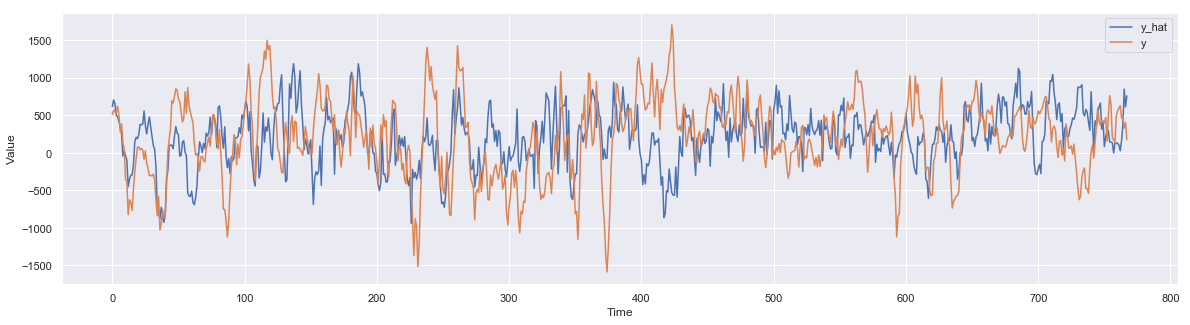

In [111]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df.iloc[:, :2].values)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.legend(['y_hat', 'y'])
plt.savefig('/Users/d3sm0/Desktop/code/ai_academy/reveal.js/ppt/energy_trading/img/seq2seq_results_sud.png')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df.iloc[:, :2].values)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
plt.legend(['y_hat', 'y'])
plt.savefig('/Users/d3sm0/Desktop/code/ai_academy/reveal.js/ppt/energy_trading/img/seq2seq_results.png')

In [22]:
fc_path ='/Users/d3sm0/Desktop/code/ml/projects/ntsa/logs/dense/ntsa-2018-11-15-19-25-21/report/23587_report.csv'